# Ciencia de Datos 

## Objetivo del reto



### Actividad 1

Utilizando la API de DENUE, extraer datos de su estado y visualizar el top 10 de Clases de actividades económicas

Para hacer esto se necesita:
1. Obtener el token del inegi
2. Hacer la llamada a la api, haciendo una consulta al endpoint BuscarEntidad, con los datos necesarios (numero del estado, registro de inicio, registro final, token)
3. Transformar la respuesta de la API en un dataframe
4. Separar la columna ubicacion en 3 columnas (localidad, municipio, estado)
5. Hacer una grafica bar char sobre cuantos establecimientos hay por clase de actividad economica





In [1]:
## Your code
!pip install folium
!pip install requests
!pip install requests pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


INEGI

El DENUE es una herramienta de fácil acceso y consulta de los datos de identificación, ubicación, contacto, actividad económica y tamaño (según estrato de personal ocupado) de los negocios ubicados en el territorio nacional.

La API del DENUE te permite consultar datos de identificación, ubicación, actividad económica y tamaño de más de 5 millones de establecimientos a nivel nacional, por entidad federativa y municipio.

https://www.inegi.org.mx/app/mapa/denue/default.aspx



INEGI
API del Banco de Indicadores

https://www.inegi.org.mx/servicios/api_indicadores.html

- Token
https://www.inegi.org.mx/app/desarrolladores/generatoken/Usuarios/token_Verify

API del Banco de Indicadores

https://www.inegi.org.mx/servicios/api_indicadores.html

- Token
https://www.inegi.org.mx/app/desarrolladores/generatoken/Usuarios/token_Verify

### INEGI

API del Banco de Indicadores

<https://www.inegi.org.mx/servicios/api_indicadores.html>

    - Token
<https://www.inegi.org.mx/app/desarrolladores/generatoken/Usuarios/token_Verify>

lo único que se expondrá será el hacer la consulta del total de unidades económicas del estado de Chihuahua y ponerlas en un mapita

In [1]:
#Uso de la API del DENUE de INEGI
#Librerías
import requests
import pandas as pd
import folium 
from folium import plugins

Posteriormente, se define la liga para la consulta de información. En esta es donde pondrás tu token:

In [2]:
#url con token
#Ejemplo: todas las unidades económicas de Chihuahua

url = "https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/08/1/100000000/96647f7e-0a32-47f5-b141-9922c123c9cb"

obtenemos la respuesta a la consulta en JSON. Posteriormente, esto se transforma en una dataframe de Pandas y se convierten las variables en minúsculas para poder trabajar con la información

In [3]:
#Respuesta de la consulta a la API
respuesta = requests.get(url).json()
#Dataframe de pandas
df= pd.DataFrame(respuesta)
##Pasamos los nombres de las variables a minúsculas
df.columns= df.columns.str.lower()

Se revisa la información de la dataframe y se compara con lo publicado por el INEGI en la página del DENUE:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128287 entries, 0 to 128286
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   clee                      128287 non-null  object
 1   id                        128287 non-null  object
 2   nombre                    128287 non-null  object
 3   razon_social              128287 non-null  object
 4   clase_actividad           128287 non-null  object
 5   estrato                   128287 non-null  object
 6   tipo_vialidad             128287 non-null  object
 7   calle                     128287 non-null  object
 8   num_exterior              128287 non-null  object
 9   num_interior              128287 non-null  object
 10  colonia                   128287 non-null  object
 11  cp                        128287 non-null  object
 12  ubicacion                 128287 non-null  object
 13  telefono                  128287 non-null  object
 14  corr

Como se puede ver, la consulta a la API arroja el mismo resultado que la página del DENUE: 128,287  unidades económicas en el estado de Chihuahua.

In [5]:
df.shape #128287 Lineas y 22 columnas

(128287, 22)

In [6]:
df.columns

Index(['clee', 'id', 'nombre', 'razon_social', 'clase_actividad', 'estrato',
       'tipo_vialidad', 'calle', 'num_exterior', 'num_interior', 'colonia',
       'cp', 'ubicacion', 'telefono', 'correo_e', 'sitio_internet', 'tipo',
       'longitud', 'latitud', 'tipo_corredor_industrial',
       'nom_corredor_industrial', 'numero_local'],
      dtype='object')

In [7]:
# Check the length of each column
for column in df.columns:
    column_length = len(df[column])
    print(f"Length of {column}: {column_length}")

Length of clee: 128287
Length of id: 128287
Length of nombre: 128287
Length of razon_social: 128287
Length of clase_actividad: 128287
Length of estrato: 128287
Length of tipo_vialidad: 128287
Length of calle: 128287
Length of num_exterior: 128287
Length of num_interior: 128287
Length of colonia: 128287
Length of cp: 128287
Length of ubicacion: 128287
Length of telefono: 128287
Length of correo_e: 128287
Length of sitio_internet: 128287
Length of tipo: 128287
Length of longitud: 128287
Length of latitud: 128287
Length of tipo_corredor_industrial: 128287
Length of nom_corredor_industrial: 128287
Length of numero_local: 128287


In [8]:
# Separar los elementos en la columna y formar nuevas columnas
df[['localidad', 'municipio', 'estado']] = df['ubicacion'].str.split(',',expand=True)

# Mostrar el DataFrame con las nuevas columnas
df.head()

clee       id  \
0  08037713943004851000001033S5  9020534   
1  08019522460000612000037857S9  9047235   
2  08019522460000602000037857S0  9047233   
3  08037522460000352000037857S4  9047138   
4  08037468412000671012001068M4  6293691   

                                            nombre  \
0                                     ALCATRAZ GYM   
1   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1   
2   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2   
3      SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3   
4                                                "   

                             razon_social  \
0                                           
1  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
2  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
3  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
4         SERVICIO NUEVO MILENIO SA DE CV   

                                     clase_actividad           estrato  \
0  Centros de acondicionamiento físico del sector...    0 a 5 personas   
1          Sociedades financieras de objeto múltiple    0 a 5 personas   
2          Sociedades financieras de objeto múltiple    0 a 5 personas   
3          Sociedades financieras de objeto múltiple    0 a 5 personas   
4         Comercio al por menor de gasolina y diesel  11 a 30 personas   

  tipo_vialidad               calle num_exterior num_interior  ...  \
0       AVENIDA         TECNOLÓGICO          169            2  ...   
1       AVENIDA    IGNACIO VALLARTA         5709            6  ...   
2         CALLE         JUAN ALDAMA        93100               ...   
3     BOULEVARD  MANUEL GOMEZ MORIN         8704               ...   
4         CALLE             SEVILLA         5161               ...   

               sitio_internet  tipo       longitud      latitud  \
0                              Fijo  -106.42433510  31.70306022   
1     WWW.SECURITYFINANCE.COM  Fijo  -106.10077538  28.67275577   
2     WWW.SECURITYFINANCE.COM  Fijo  -106.86446449  28.40425242   
3  WWW.SECURITYFINANCE.COM.MX  Fijo  -106.40144310  31.70292415   
4              WWW.GAZPRO.COM  Fijo  -106.46720991  31.71298329   

  tipo_corredor_industrial nom_corredor_industrial numero_local   localidad  \
0                                                                    JUÁREZ   
1                                                                 CHIHUAHUA   
2                                                                CUAUHTÉMOC   
3                                                                    JUÁREZ   
4                                                                    JUÁREZ   

     municipio      estado  
0       Juárez   CHIHUAHUA  
1    Chihuahua   CHIHUAHUA  
2   Cuauhtémoc   CHIHUAHUA  
3       Juárez   CHIHUAHUA  
4       Juárez   CHIHUAHUA  

[5 rows x 25 columns]

In [9]:
df.set_index('id', inplace = True)
df.head()

clee  \
id                                      
9020534  08037713943004851000001033S5   
9047235  08019522460000612000037857S9   
9047233  08019522460000602000037857S0   
9047138  08037522460000352000037857S4   
6293691  08037468412000671012001068M4   

                                                  nombre  \
id                                                         
9020534                                     ALCATRAZ GYM   
9047235   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1   
9047233   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2   
9047138      SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3   
6293691                                                "   

                                   razon_social  \
id                                                
9020534                                           
9047235  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047233  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047138  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
6293691         SERVICIO NUEVO MILENIO SA DE CV   

                                           clase_actividad           estrato  \
id                                                                             
9020534  Centros de acondicionamiento físico del sector...    0 a 5 personas   
9047235          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047233          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047138          Sociedades financieras de objeto múltiple    0 a 5 personas   
6293691         Comercio al por menor de gasolina y diesel  11 a 30 personas   

        tipo_vialidad               calle num_exterior num_interior  \
id                                                                    
9020534       AVENIDA         TECNOLÓGICO          169            2   
9047235       AVENIDA    IGNACIO VALLARTA         5709            6   
9047233         CALLE         JUAN ALDAMA        93100                
9047138     BOULEVARD  MANUEL GOMEZ MORIN         8704                
6293691         CALLE             SEVILLA         5161                

                  colonia  ...              sitio_internet  tipo  \
id                         ...                                     
9020534  PARTIDO IGLESIAS  ...                              Fijo   
9047235       LAS GRANJAS  ...     WWW.SECURITYFINANCE.COM  Fijo   
9047233            CENTRO  ...     WWW.SECURITYFINANCE.COM  Fijo   
9047138    PARTIDO SENECU  ...  WWW.SECURITYFINANCE.COM.MX  Fijo   
6293691       SAN ANTONIO  ...              WWW.GAZPRO.COM  Fijo   

              longitud      latitud tipo_corredor_industrial  \
id                                                             
9020534  -106.42433510  31.70306022                            
9047235  -106.10077538  28.67275577                            
9047233  -106.86446449  28.40425242                            
9047138  -106.40144310  31.70292415                            
6293691  -106.46720991  31.71298329                            

        nom_corredor_industrial numero_local   localidad    municipio  \
id                                                                      
9020534                                           JUÁREZ       Juárez   
9047235                                        CHIHUAHUA    Chihuahua   
9047233                                       CUAUHTÉMOC   Cuauhtémoc   
9047138                                           JUÁREZ       Juárez   
6293691                                           JUÁREZ       Juárez   

             estado  
id                   
9020534   CHIHUAHUA  
9047235   CHIHUAHUA  
9047233   CHIHUAHUA  
9047138   CHIHUAHUA  
6293691   CHIHUAHUA  

[5 rows x 24 columns]

grafica bar char sobre cuantos establecimientos hay por clase de actividad economica

In [12]:
import numpy as np
df.replace('', np.nan, inplace = True)
rows_with_missing = df[df.isna().any(axis = 1)]
print(f"Number of rows with missing values: {len(rows_with_missing)}")
columns_to_delete = []
for column in df.columns:
    if df[column].isna().sum() > 1:
        columns_to_delete.append(column)
print(columns_to_delete)
print(len(columns_to_delete))

Number of rows with missing values: 128244
['razon_social', 'tipo_vialidad', 'calle', 'num_exterior', 'num_interior', 'colonia', 'cp', 'telefono', 'correo_e', 'sitio_internet', 'tipo_corredor_industrial', 'nom_corredor_industrial', 'numero_local']
13


In [14]:
df.head()

clee  \
id                                      
9020534  08037713943004851000001033S5   
9047235  08019522460000612000037857S9   
9047233  08019522460000602000037857S0   
9047138  08037522460000352000037857S4   
6293691  08037468412000671012001068M4   

                                                  nombre  \
id                                                         
9020534                                     ALCATRAZ GYM   
9047235   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1   
9047233   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2   
9047138      SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3   
6293691                                                "   

                                   razon_social  \
id                                                
9020534                                     NaN   
9047235  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047233  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047138  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
6293691         SERVICIO NUEVO MILENIO SA DE CV   

                                           clase_actividad           estrato  \
id                                                                             
9020534  Centros de acondicionamiento físico del sector...    0 a 5 personas   
9047235          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047233          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047138          Sociedades financieras de objeto múltiple    0 a 5 personas   
6293691         Comercio al por menor de gasolina y diesel  11 a 30 personas   

        tipo_vialidad               calle num_exterior num_interior  \
id                                                                    
9020534       AVENIDA         TECNOLÓGICO          169            2   
9047235       AVENIDA    IGNACIO VALLARTA         5709            6   
9047233         CALLE         JUAN ALDAMA        93100          NaN   
9047138     BOULEVARD  MANUEL GOMEZ MORIN         8704          NaN   
6293691         CALLE             SEVILLA         5161          NaN   

                  colonia  ...              sitio_internet  tipo  \
id                         ...                                     
9020534  PARTIDO IGLESIAS  ...                         NaN  Fijo   
9047235       LAS GRANJAS  ...     WWW.SECURITYFINANCE.COM  Fijo   
9047233            CENTRO  ...     WWW.SECURITYFINANCE.COM  Fijo   
9047138    PARTIDO SENECU  ...  WWW.SECURITYFINANCE.COM.MX  Fijo   
6293691       SAN ANTONIO  ...              WWW.GAZPRO.COM  Fijo   

              longitud      latitud tipo_corredor_industrial  \
id                                                             
9020534  -106.42433510  31.70306022                      NaN   
9047235  -106.10077538  28.67275577                      NaN   
9047233  -106.86446449  28.40425242                      NaN   
9047138  -106.40144310  31.70292415                      NaN   
6293691  -106.46720991  31.71298329                      NaN   

        nom_corredor_industrial numero_local   localidad    municipio  \
id                                                                      
9020534                     NaN          NaN      JUÁREZ       Juárez   
9047235                     NaN          NaN   CHIHUAHUA    Chihuahua   
9047233                     NaN          NaN  CUAUHTÉMOC   Cuauhtémoc   
9047138                     NaN          NaN      JUÁREZ       Juárez   
6293691                     NaN          NaN      JUÁREZ       Juárez   

             estado  
id                   
9020534   CHIHUAHUA  
9047235   CHIHUAHUA  
9047233   CHIHUAHUA  
9047138   CHIHUAHUA  
6293691   CHIHUAHUA  

[5 rows x 24 columns]

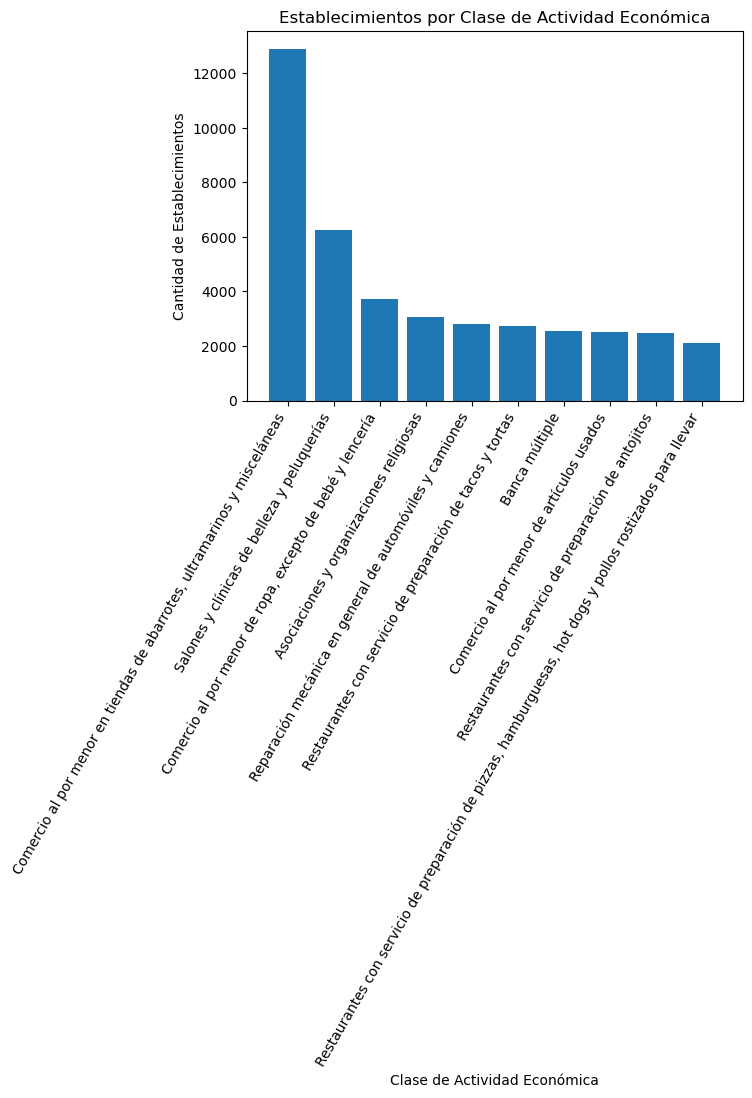

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
#cantidad de establecimientos por clase de actividad económica
#utilizando el método  value_counts()
datos = df['clase_actividad'].value_counts()
# Select the desired number of values for the x-axis
num_values = 10
datos_sliced = datos[:num_values]
#Función  plt.bar()  para crear el gráfico de barras, 
#pasando los datos de las clases de actividad económica 
plt.bar(datos_sliced.index, datos_sliced.values)
# Personalizar el gráfico
plt.title('Establecimientos por Clase de Actividad Económica')
plt.xlabel('Clase de Actividad Económica')
plt.ylabel('Cantidad de Establecimientos')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=60, ha='right')

# Mostrar el gráfico
plt.show()

 generar un mapa de calor utilizando Folium. Para esto, se seleccionarán únicamente las latitudes y longitudes de los registros y se convertirá en un array:

In [17]:
#Seleccionamos solo la latitud y longitud
df=df[["latitud", "longitud"]]
#Convertimos nuestra df a un array
df =df.values

Posteriormente, se escribe el código para generar el mapa

In [18]:
import folium

# Create a map object
map = folium.Map(location=[28.6329,-106.0691], zoom_start=10)

#Heatmap
map.add_child(plugins.HeatMap(df, radius=15))

# Add markers to the map
folium.Marker([28.6329,-106.0691], popup='Chihuahua').add_to(map)

# Display the map
map

### Actividad 2

Seleccionar dos entidades y hacer comparativos sobre la clase de actividad economica

1. Obtener el token del inegi
2. Hacer la llamada a la api, haciendo una consulta al endpoint BuscarEntidad, con los datos necesarios (numero del estado, registro de inicio, registro final, token) para cada estado
3. Transformar las respuestas a dos dataframes
4. Unir los dataframes usando la funcion concat (https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
5. Separar la columna ubicacion en 3 columnas (localidad, municipio, estado)
6. Hacer la comparacion sobre la clase de actividad economica entre los dos estados

**Deadline Sunday 03th** 

*#HappyCoding*

In [19]:
#url con token
#Ejemplo: todas las unidades económicas de Chihuahua
url1 = "https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/08/1/100000000/96647f7e-0a32-47f5-b141-9922c123c9cb"
url2 = "https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/26/1/100000000/96647f7e-0a32-47f5-b141-9922c123c9cb"

In [23]:
#Respuesta 1 de la consulta a la API
respuesta1 = requests.get(url1).json()
#Dataframe de pandas
dfchihuahua= pd.DataFrame(respuesta1)
##Pasamos los nombres de las variables a minúsculas
dfchihuahua.columns= dfchihuahua.columns.str.lower()
#Respuesta 2 de la consulta a la API
respuesta2 = requests.get(url2).json()
#Dataframe de pandas
dfsonora= pd.DataFrame(respuesta2)
##Pasamos los nombres de las variables a minúsculas
dfsonora.columns= dfsonora.columns.str.lower()

In [27]:
dfchihuahua.set_index('id', inplace = True)
dfchihuahua.head()

clee  \
id                                      
9020534  08037713943004851000001033S5   
9047235  08019522460000612000037857S9   
9047233  08019522460000602000037857S0   
9047138  08037522460000352000037857S4   
6293691  08037468412000671012001068M4   

                                                  nombre  \
id                                                         
9020534                                     ALCATRAZ GYM   
9047235   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1   
9047233   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2   
9047138      SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3   
6293691                                                "   

                                   razon_social  \
id                                                
9020534                                           
9047235  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047233  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047138  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
6293691         SERVICIO NUEVO MILENIO SA DE CV   

                                           clase_actividad           estrato  \
id                                                                             
9020534  Centros de acondicionamiento físico del sector...    0 a 5 personas   
9047235          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047233          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047138          Sociedades financieras de objeto múltiple    0 a 5 personas   
6293691         Comercio al por menor de gasolina y diesel  11 a 30 personas   

        tipo_vialidad               calle num_exterior num_interior  \
id                                                                    
9020534       AVENIDA         TECNOLÓGICO          169            2   
9047235       AVENIDA    IGNACIO VALLARTA         5709            6   
9047233         CALLE         JUAN ALDAMA        93100                
9047138     BOULEVARD  MANUEL GOMEZ MORIN         8704                
6293691         CALLE             SEVILLA         5161                

                  colonia  ...                          ubicacion telefono  \
id                         ...                                               
9020534  PARTIDO IGLESIAS  ...          JUÁREZ, Juárez, CHIHUAHUA            
9047235       LAS GRANJAS  ...    CHIHUAHUA, Chihuahua, CHIHUAHUA            
9047233            CENTRO  ...  CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA            
9047138    PARTIDO SENECU  ...          JUÁREZ, Juárez, CHIHUAHUA            
6293691       SAN ANTONIO  ...          JUÁREZ, Juárez, CHIHUAHUA            

                               correo_e              sitio_internet  tipo  \
id                                                                          
9020534                                                              Fijo   
9047235                                     WWW.SECURITYFINANCE.COM  Fijo   
9047233                                     WWW.SECURITYFINANCE.COM  Fijo   
9047138                                  WWW.SECURITYFINANCE.COM.MX  Fijo   
6293691  ALEJANDRA.GARCIA@GAZPRO.COM.MX              WWW.GAZPRO.COM  Fijo   

              longitud      latitud tipo_corredor_industrial  \
id                                                             
9020534  -106.42433510  31.70306022                            
9047235  -106.10077538  28.67275577                            
9047233  -106.86446449  28.40425242                            
9047138  -106.40144310  31.70292415                            
6293691  -106.46720991  31.71298329                            

        nom_corredor_industrial numero_local  
id                                            
9020534                                       
9047235                                       
9047233                                       
9047138                                       
6293691                                       

[5 rows x 21 columns]

In [29]:
import numpy as np
dfchihuahua.replace('', np.nan, inplace = True)
rows_with_missing = dfchihuahua[dfchihuahua.isna().any(axis = 1)]
print(f"Number of rows with missing values: {len(rows_with_missing)}")
columns_to_delete = []
for column in dfchihuahua.columns:
    if dfchihuahua[column].isna().sum() > 1:
        columns_to_delete.append(column)
print(columns_to_delete)
print(len(columns_to_delete))

Number of rows with missing values: 128244
['razon_social', 'tipo_vialidad', 'calle', 'num_exterior', 'num_interior', 'colonia', 'cp', 'telefono', 'correo_e', 'sitio_internet', 'tipo_corredor_industrial', 'nom_corredor_industrial', 'numero_local']
13


In [31]:
dfchihuahua.head()

clee  \
id                                      
9020534  08037713943004851000001033S5   
9047235  08019522460000612000037857S9   
9047233  08019522460000602000037857S0   
9047138  08037522460000352000037857S4   
6293691  08037468412000671012001068M4   

                                                  nombre  \
id                                                         
9020534                                     ALCATRAZ GYM   
9047235   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1   
9047233   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2   
9047138      SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3   
6293691                                                "   

                                   razon_social  \
id                                                
9020534                                     NaN   
9047235  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047233  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047138  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
6293691         SERVICIO NUEVO MILENIO SA DE CV   

                                           clase_actividad           estrato  \
id                                                                             
9020534  Centros de acondicionamiento físico del sector...    0 a 5 personas   
9047235          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047233          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047138          Sociedades financieras de objeto múltiple    0 a 5 personas   
6293691         Comercio al por menor de gasolina y diesel  11 a 30 personas   

        tipo_vialidad               calle num_exterior num_interior  \
id                                                                    
9020534       AVENIDA         TECNOLÓGICO          169            2   
9047235       AVENIDA    IGNACIO VALLARTA         5709            6   
9047233         CALLE         JUAN ALDAMA        93100          NaN   
9047138     BOULEVARD  MANUEL GOMEZ MORIN         8704          NaN   
6293691         CALLE             SEVILLA         5161          NaN   

                  colonia  ...                          ubicacion telefono  \
id                         ...                                               
9020534  PARTIDO IGLESIAS  ...          JUÁREZ, Juárez, CHIHUAHUA      NaN   
9047235       LAS GRANJAS  ...    CHIHUAHUA, Chihuahua, CHIHUAHUA      NaN   
9047233            CENTRO  ...  CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA      NaN   
9047138    PARTIDO SENECU  ...          JUÁREZ, Juárez, CHIHUAHUA      NaN   
6293691       SAN ANTONIO  ...          JUÁREZ, Juárez, CHIHUAHUA      NaN   

                               correo_e              sitio_internet  tipo  \
id                                                                          
9020534                             NaN                         NaN  Fijo   
9047235                             NaN     WWW.SECURITYFINANCE.COM  Fijo   
9047233                             NaN     WWW.SECURITYFINANCE.COM  Fijo   
9047138                             NaN  WWW.SECURITYFINANCE.COM.MX  Fijo   
6293691  ALEJANDRA.GARCIA@GAZPRO.COM.MX              WWW.GAZPRO.COM  Fijo   

              longitud      latitud tipo_corredor_industrial  \
id                                                             
9020534  -106.42433510  31.70306022                      NaN   
9047235  -106.10077538  28.67275577                      NaN   
9047233  -106.86446449  28.40425242                      NaN   
9047138  -106.40144310  31.70292415                      NaN   
6293691  -106.46720991  31.71298329                      NaN   

        nom_corredor_industrial numero_local  
id                                            
9020534                     NaN          NaN  
9047235                     NaN          NaN  
9047233                     NaN          NaN  
9047138                     NaN          NaN  
6293691                     NaN          NaN  

[5 rows x 21 columns]

In [40]:
# Separar los elementos en la columna y formar nuevas columnas
dfchihuahua[['localidad', 'municipio', 'estado']] = dfchihuahua['ubicacion'].str.split(',',expand=True)

# Mostrar el DataFrame con las nuevas columnas
dfchihuahua.head()

clee  \
id                                      
9020534  08037713943004851000001033S5   
9047235  08019522460000612000037857S9   
9047233  08019522460000602000037857S0   
9047138  08037522460000352000037857S4   
6293691  08037468412000671012001068M4   

                                                  nombre  \
id                                                         
9020534                                     ALCATRAZ GYM   
9047235   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1   
9047233   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2   
9047138      SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3   
6293691                                                "   

                                   razon_social  \
id                                                
9020534                                     NaN   
9047235  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047233  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047138  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
6293691         SERVICIO NUEVO MILENIO SA DE CV   

                                           clase_actividad           estrato  \
id                                                                             
9020534  Centros de acondicionamiento físico del sector...    0 a 5 personas   
9047235          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047233          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047138          Sociedades financieras de objeto múltiple    0 a 5 personas   
6293691         Comercio al por menor de gasolina y diesel  11 a 30 personas   

        tipo_vialidad               calle num_exterior num_interior  \
id                                                                    
9020534       AVENIDA         TECNOLÓGICO          169            2   
9047235       AVENIDA    IGNACIO VALLARTA         5709            6   
9047233         CALLE         JUAN ALDAMA        93100          NaN   
9047138     BOULEVARD  MANUEL GOMEZ MORIN         8704          NaN   
6293691         CALLE             SEVILLA         5161          NaN   

                  colonia  ...              sitio_internet  tipo  \
id                         ...                                     
9020534  PARTIDO IGLESIAS  ...                         NaN  Fijo   
9047235       LAS GRANJAS  ...     WWW.SECURITYFINANCE.COM  Fijo   
9047233            CENTRO  ...     WWW.SECURITYFINANCE.COM  Fijo   
9047138    PARTIDO SENECU  ...  WWW.SECURITYFINANCE.COM.MX  Fijo   
6293691       SAN ANTONIO  ...              WWW.GAZPRO.COM  Fijo   

              longitud      latitud tipo_corredor_industrial  \
id                                                             
9020534  -106.42433510  31.70306022                      NaN   
9047235  -106.10077538  28.67275577                      NaN   
9047233  -106.86446449  28.40425242                      NaN   
9047138  -106.40144310  31.70292415                      NaN   
6293691  -106.46720991  31.71298329                      NaN   

        nom_corredor_industrial numero_local   localidad    municipio  \
id                                                                      
9020534                     NaN          NaN      JUÁREZ       Juárez   
9047235                     NaN          NaN   CHIHUAHUA    Chihuahua   
9047233                     NaN          NaN  CUAUHTÉMOC   Cuauhtémoc   
9047138                     NaN          NaN      JUÁREZ       Juárez   
6293691                     NaN          NaN      JUÁREZ       Juárez   

             estado  
id                   
9020534   CHIHUAHUA  
9047235   CHIHUAHUA  
9047233   CHIHUAHUA  
9047138   CHIHUAHUA  
6293691   CHIHUAHUA  

[5 rows x 24 columns]

In [32]:
dfsonora.set_index('id', inplace = True)
dfsonora.head()

clee  \
id                                      
8332011  26035468411000053000018711S9   
8853689  26018114111000014000000000U1   
9047142  26029522460000092000037857S1   
9047240  26030522460000482000037857S2   
8444561  26018522460000372000037857S0   

                                                   nombre  \
id                                                          
8332011                 ESTACION DE GASOLINA 10747 CIBUTA   
8853689                       LOS BETINGOS SC DE RL DE CV   
9047142        SECURITY FINANCE CASA DE PRESTAMOS GUAYMAS   
9047240   SECURITY FINANCE CASA DE PRESTAMOS HERMOSILLO 3   
8444561       SECURITY FINANCE CASA DE PRESTAMOS OBREGON    

                                   razon_social  \
id                                                
8332011            ESTACION EL NARANJO SA DE CV   
8853689             LOS BETINGOS SC DE RL DE CV   
9047142  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047240  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
8444561  CASA DE AMIGOS DE MEXICO S DE RL DE CV   

                                    clase_actividad           estrato  \
id                                                                      
8332011  Comercio al por menor de gasolina y diesel  11 a 30 personas   
8853689                            Pesca de camarón  11 a 30 personas   
9047142   Sociedades financieras de objeto múltiple    0 a 5 personas   
9047240   Sociedades financieras de objeto múltiple    0 a 5 personas   
8444561   Sociedades financieras de objeto múltiple    0 a 5 personas   

        tipo_vialidad                             calle num_exterior  \
id                                                                     
8332011     CARRETERA                     Internacional          239   
8853689         CALLE                   ZONA REVOLUCION            4   
9047142       AVENIDA                            SERDAN          184   
9047240       AVENIDA                PERIFERICO ORIENTE         1274   
8444561         CALLE  LICENCIADO MIGUEL ALEMÁN VELASCO          275   

        num_interior            colonia  ...  \
id                                       ...   
8332011            0         EL POTRERO  ...   
8853689            0  EJIDO QUECHEHUECA  ...   
9047142                          CENTRO  ...   
9047240                  PERIFERICO SUR  ...   
8444561            0             CENTRO  ...   

                                           ubicacion telefono  \
id                                                              
8332011  EL POTRERO (GANADERA LOMAS), Imuris, SONORA            
8853689                 QUETCHEHUECA, Cajeme, SONORA            
9047142             HEROICA GUAYMAS, Guaymas, SONORA            
9047240               HERMOSILLO, Hermosillo, SONORA            
8444561               CIUDAD OBREGÓN, Cajeme, SONORA            

                  correo_e           sitio_internet  tipo       longitud  \
id                                                                         
8332011  INFO@GRUPOECO.COM                           Fijo  -110.88988722   
8853689                                              Fijo  -109.94957117   
9047142                     WWW.SECURITYFINANCE.COM  Fijo  -110.89523365   
9047240                     WWW.SECURITYFINANCE.COM  Fijo  -110.94044613   
8444561                     WWW.SECURITYFINANCE.COM  Fijo  -109.93039270   

             latitud tipo_corredor_industrial nom_corredor_industrial  \
id                                                                      
8332011  31.02264472                                                    
8853689  27.26195220                                                    
9047142  27.92314478                                                    
9047240  29.03533569                                                    
8444561  27.49200223                                                    

        numero_local  
id                    
8332011               
8853689               
9047142     

In [33]:
import numpy as np
dfsonora.replace('', np.nan, inplace = True)
rows_with_missing = dfsonora[dfsonora.isna().any(axis = 1)]
print(f"Number of rows with missing values: {len(rows_with_missing)}")
columns_to_delete = []
for column in dfsonora.columns:
    if dfsonora[column].isna().sum() > 1:
        columns_to_delete.append(column)
print(columns_to_delete)
print(len(columns_to_delete))

Number of rows with missing values: 118945
['razon_social', 'tipo_vialidad', 'calle', 'num_exterior', 'num_interior', 'colonia', 'cp', 'telefono', 'correo_e', 'sitio_internet', 'tipo_corredor_industrial', 'nom_corredor_industrial', 'numero_local']
13


In [34]:
dfsonora.head()

clee  \
id                                      
8332011  26035468411000053000018711S9   
8853689  26018114111000014000000000U1   
9047142  26029522460000092000037857S1   
9047240  26030522460000482000037857S2   
8444561  26018522460000372000037857S0   

                                                   nombre  \
id                                                          
8332011                 ESTACION DE GASOLINA 10747 CIBUTA   
8853689                       LOS BETINGOS SC DE RL DE CV   
9047142        SECURITY FINANCE CASA DE PRESTAMOS GUAYMAS   
9047240   SECURITY FINANCE CASA DE PRESTAMOS HERMOSILLO 3   
8444561       SECURITY FINANCE CASA DE PRESTAMOS OBREGON    

                                   razon_social  \
id                                                
8332011            ESTACION EL NARANJO SA DE CV   
8853689             LOS BETINGOS SC DE RL DE CV   
9047142  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047240  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
8444561  CASA DE AMIGOS DE MEXICO S DE RL DE CV   

                                    clase_actividad           estrato  \
id                                                                      
8332011  Comercio al por menor de gasolina y diesel  11 a 30 personas   
8853689                            Pesca de camarón  11 a 30 personas   
9047142   Sociedades financieras de objeto múltiple    0 a 5 personas   
9047240   Sociedades financieras de objeto múltiple    0 a 5 personas   
8444561   Sociedades financieras de objeto múltiple    0 a 5 personas   

        tipo_vialidad                             calle num_exterior  \
id                                                                     
8332011     CARRETERA                     Internacional          239   
8853689         CALLE                   ZONA REVOLUCION            4   
9047142       AVENIDA                            SERDAN          184   
9047240       AVENIDA                PERIFERICO ORIENTE         1274   
8444561         CALLE  LICENCIADO MIGUEL ALEMÁN VELASCO          275   

        num_interior            colonia  ...  \
id                                       ...   
8332011            0         EL POTRERO  ...   
8853689            0  EJIDO QUECHEHUECA  ...   
9047142          NaN             CENTRO  ...   
9047240          NaN     PERIFERICO SUR  ...   
8444561            0             CENTRO  ...   

                                           ubicacion telefono  \
id                                                              
8332011  EL POTRERO (GANADERA LOMAS), Imuris, SONORA      NaN   
8853689                 QUETCHEHUECA, Cajeme, SONORA      NaN   
9047142             HEROICA GUAYMAS, Guaymas, SONORA      NaN   
9047240               HERMOSILLO, Hermosillo, SONORA      NaN   
8444561               CIUDAD OBREGÓN, Cajeme, SONORA      NaN   

                  correo_e           sitio_internet  tipo       longitud  \
id                                                                         
8332011  INFO@GRUPOECO.COM                      NaN  Fijo  -110.88988722   
8853689                NaN                      NaN  Fijo  -109.94957117   
9047142                NaN  WWW.SECURITYFINANCE.COM  Fijo  -110.89523365   
9047240                NaN  WWW.SECURITYFINANCE.COM  Fijo  -110.94044613   
8444561                NaN  WWW.SECURITYFINANCE.COM  Fijo  -109.93039270   

             latitud tipo_corredor_industrial nom_corredor_industrial  \
id                                                                      
8332011  31.02264472                      NaN                     NaN   
8853689  27.26195220                      NaN                     NaN   
9047142  27.92314478                      NaN                     NaN   
9047240  29.03533569                      NaN                     NaN   
8444561  27.49200223                      NaN                     NaN   

        numero_local  
id                    
8332011          NaN  
8853689          NaN  
9047142     

In [42]:
# Separar los elementos en la columna y formar nuevas columnas
dfsonora[['localidad', 'municipio', 'estado']] = dfsonora['ubicacion'].str.split(',',expand=True)

# Mostrar el DataFrame con las nuevas columnas
dfsonora.head()

clee  \
id                                      
8332011  26035468411000053000018711S9   
8853689  26018114111000014000000000U1   
9047142  26029522460000092000037857S1   
9047240  26030522460000482000037857S2   
8444561  26018522460000372000037857S0   

                                                   nombre  \
id                                                          
8332011                 ESTACION DE GASOLINA 10747 CIBUTA   
8853689                       LOS BETINGOS SC DE RL DE CV   
9047142        SECURITY FINANCE CASA DE PRESTAMOS GUAYMAS   
9047240   SECURITY FINANCE CASA DE PRESTAMOS HERMOSILLO 3   
8444561       SECURITY FINANCE CASA DE PRESTAMOS OBREGON    

                                   razon_social  \
id                                                
8332011            ESTACION EL NARANJO SA DE CV   
8853689             LOS BETINGOS SC DE RL DE CV   
9047142  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047240  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
8444561  CASA DE AMIGOS DE MEXICO S DE RL DE CV   

                                    clase_actividad           estrato  \
id                                                                      
8332011  Comercio al por menor de gasolina y diesel  11 a 30 personas   
8853689                            Pesca de camarón  11 a 30 personas   
9047142   Sociedades financieras de objeto múltiple    0 a 5 personas   
9047240   Sociedades financieras de objeto múltiple    0 a 5 personas   
8444561   Sociedades financieras de objeto múltiple    0 a 5 personas   

        tipo_vialidad                             calle num_exterior  \
id                                                                     
8332011     CARRETERA                     Internacional          239   
8853689         CALLE                   ZONA REVOLUCION            4   
9047142       AVENIDA                            SERDAN          184   
9047240       AVENIDA                PERIFERICO ORIENTE         1274   
8444561         CALLE  LICENCIADO MIGUEL ALEMÁN VELASCO          275   

        num_interior            colonia  ...           sitio_internet  tipo  \
id                                       ...                                  
8332011            0         EL POTRERO  ...                      NaN  Fijo   
8853689            0  EJIDO QUECHEHUECA  ...                      NaN  Fijo   
9047142          NaN             CENTRO  ...  WWW.SECURITYFINANCE.COM  Fijo   
9047240          NaN     PERIFERICO SUR  ...  WWW.SECURITYFINANCE.COM  Fijo   
8444561            0             CENTRO  ...  WWW.SECURITYFINANCE.COM  Fijo   

              longitud      latitud tipo_corredor_industrial  \
id                                                             
8332011  -110.88988722  31.02264472                      NaN   
8853689  -109.94957117  27.26195220                      NaN   
9047142  -110.89523365  27.92314478                      NaN   
9047240  -110.94044613  29.03533569                      NaN   
8444561  -109.93039270  27.49200223                      NaN   

        nom_corredor_industrial numero_local                    localidad  \
id                                                                          
8332011                     NaN          NaN  EL POTRERO (GANADERA LOMAS)   
8853689                     NaN          NaN                 QUETCHEHUECA   
9047142                     NaN          NaN              HEROICA GUAYMAS   
9047240                     NaN          NaN                   HERMOSILLO   
8444561                     NaN          NaN               CIUDAD OBREGÓN   

           municipio   estado  
id                             
8332011       Imuris   SONORA  
8853689       Cajeme   SONORA  
9047142      Guaymas   SONORA  
9047240   Hermosillo   SONORA  
8444561       Cajeme   SONORA  

[5 rows x 24 columns]

In [45]:
# Concatenate the dataframes vertically
result = pd.concat([dfchihuahua, dfsonora])

result.head()

clee  \
id                                      
9020534  08037713943004851000001033S5   
9047235  08019522460000612000037857S9   
9047233  08019522460000602000037857S0   
9047138  08037522460000352000037857S4   
6293691  08037468412000671012001068M4   

                                                  nombre  \
id                                                         
9020534                                     ALCATRAZ GYM   
9047235   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1   
9047233   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2   
9047138      SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3   
6293691                                                "   

                                   razon_social  \
id                                                
9020534                                     NaN   
9047235  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047233  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047138  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
6293691         SERVICIO NUEVO MILENIO SA DE CV   

                                           clase_actividad           estrato  \
id                                                                             
9020534  Centros de acondicionamiento físico del sector...    0 a 5 personas   
9047235          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047233          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047138          Sociedades financieras de objeto múltiple    0 a 5 personas   
6293691         Comercio al por menor de gasolina y diesel  11 a 30 personas   

        tipo_vialidad               calle num_exterior num_interior  \
id                                                                    
9020534       AVENIDA         TECNOLÓGICO          169            2   
9047235       AVENIDA    IGNACIO VALLARTA         5709            6   
9047233         CALLE         JUAN ALDAMA        93100          NaN   
9047138     BOULEVARD  MANUEL GOMEZ MORIN         8704          NaN   
6293691         CALLE             SEVILLA         5161          NaN   

                  colonia  ...              sitio_internet  tipo  \
id                         ...                                     
9020534  PARTIDO IGLESIAS  ...                         NaN  Fijo   
9047235       LAS GRANJAS  ...     WWW.SECURITYFINANCE.COM  Fijo   
9047233            CENTRO  ...     WWW.SECURITYFINANCE.COM  Fijo   
9047138    PARTIDO SENECU  ...  WWW.SECURITYFINANCE.COM.MX  Fijo   
6293691       SAN ANTONIO  ...              WWW.GAZPRO.COM  Fijo   

              longitud      latitud tipo_corredor_industrial  \
id                                                             
9020534  -106.42433510  31.70306022                      NaN   
9047235  -106.10077538  28.67275577                      NaN   
9047233  -106.86446449  28.40425242                      NaN   
9047138  -106.40144310  31.70292415                      NaN   
6293691  -106.46720991  31.71298329                      NaN   

        nom_corredor_industrial numero_local   localidad    municipio  \
id                                                                      
9020534                     NaN          NaN      JUÁREZ       Juárez   
9047235                     NaN          NaN   CHIHUAHUA    Chihuahua   
9047233                     NaN          NaN  CUAUHTÉMOC   Cuauhtémoc   
9047138                     NaN          NaN      JUÁREZ       Juárez   
6293691                     NaN          NaN      JUÁREZ       Juárez   

             estado  
id                   
9020534   CHIHUAHUA  
9047235   CHIHUAHUA  
9047233   CHIHUAHUA  
9047138   CHIHUAHUA  
6293691   CHIHUAHUA  

[5 rows x 24 columns]

In [46]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247269 entries, 9020534 to 8534652
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   clee                      247269 non-null  object
 1   nombre                    247269 non-null  object
 2   razon_social              67180 non-null   object
 3   clase_actividad           247269 non-null  object
 4   estrato                   247269 non-null  object
 5   tipo_vialidad             246456 non-null  object
 6   calle                     247244 non-null  object
 7   num_exterior              169463 non-null  object
 8   num_interior              83488 non-null   object
 9   colonia                   247242 non-null  object
 10  cp                        244174 non-null  object
 11  ubicacion                 247269 non-null  object
 12  telefono                  104102 non-null  object
 13  correo_e                  44463 non-null   object
 14  si

In [47]:
result2 = pd.concat([dfchihuahua, dfsonora], axis=1)

In [48]:
result2.head()

clee  \
id                                      
9020534  08037713943004851000001033S5   
9047235  08019522460000612000037857S9   
9047233  08019522460000602000037857S0   
9047138  08037522460000352000037857S4   
6293691  08037468412000671012001068M4   

                                                  nombre  \
id                                                         
9020534                                     ALCATRAZ GYM   
9047235   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1   
9047233   SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2   
9047138      SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3   
6293691                                                "   

                                   razon_social  \
id                                                
9020534                                     NaN   
9047235  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047233  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
9047138  CASA DE AMIGOS DE MEXICO S DE RL DE CV   
6293691         SERVICIO NUEVO MILENIO SA DE CV   

                                           clase_actividad           estrato  \
id                                                                             
9020534  Centros de acondicionamiento físico del sector...    0 a 5 personas   
9047235          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047233          Sociedades financieras de objeto múltiple    0 a 5 personas   
9047138          Sociedades financieras de objeto múltiple    0 a 5 personas   
6293691         Comercio al por menor de gasolina y diesel  11 a 30 personas   

        tipo_vialidad               calle num_exterior num_interior  \
id                                                                    
9020534       AVENIDA         TECNOLÓGICO          169            2   
9047235       AVENIDA    IGNACIO VALLARTA         5709            6   
9047233         CALLE         JUAN ALDAMA        93100          NaN   
9047138     BOULEVARD  MANUEL GOMEZ MORIN         8704          NaN   
6293691         CALLE             SEVILLA         5161          NaN   

                  colonia  ... sitio_internet tipo longitud latitud  \
id                         ...                                        
9020534  PARTIDO IGLESIAS  ...            NaN  NaN      NaN     NaN   
9047235       LAS GRANJAS  ...            NaN  NaN      NaN     NaN   
9047233            CENTRO  ...            NaN  NaN      NaN     NaN   
9047138    PARTIDO SENECU  ...            NaN  NaN      NaN     NaN   
6293691       SAN ANTONIO  ...            NaN  NaN      NaN     NaN   

        tipo_corredor_industrial nom_corredor_industrial numero_local  \
id                                                                      
9020534                      NaN                     NaN          NaN   
9047235                      NaN                     NaN          NaN   
9047233                      NaN                     NaN          NaN   
9047138                      NaN                     NaN          NaN   
6293691                      NaN                     NaN          NaN   

        localidad municipio estado  
id                                  
9020534       NaN       NaN    NaN  
9047235       NaN       NaN    NaN  
9047233       NaN       NaN    NaN  
9047138       NaN       NaN    NaN  
6293691       NaN       NaN    NaN  

[5 rows x 48 columns]

In [49]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247269 entries, 9020534 to 8534652
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   clee                      128287 non-null  object
 1   nombre                    128287 non-null  object
 2   razon_social              34668 non-null   object
 3   clase_actividad           128287 non-null  object
 4   estrato                   128287 non-null  object
 5   tipo_vialidad             127960 non-null  object
 6   calle                     128280 non-null  object
 7   num_exterior              92921 non-null   object
 8   num_interior              43958 non-null   object
 9   colonia                   128269 non-null  object
 10  cp                        126670 non-null  object
 11  ubicacion                 128287 non-null  object
 12  telefono                  54613 non-null   object
 13  correo_e                  19845 non-null   object
 14  si

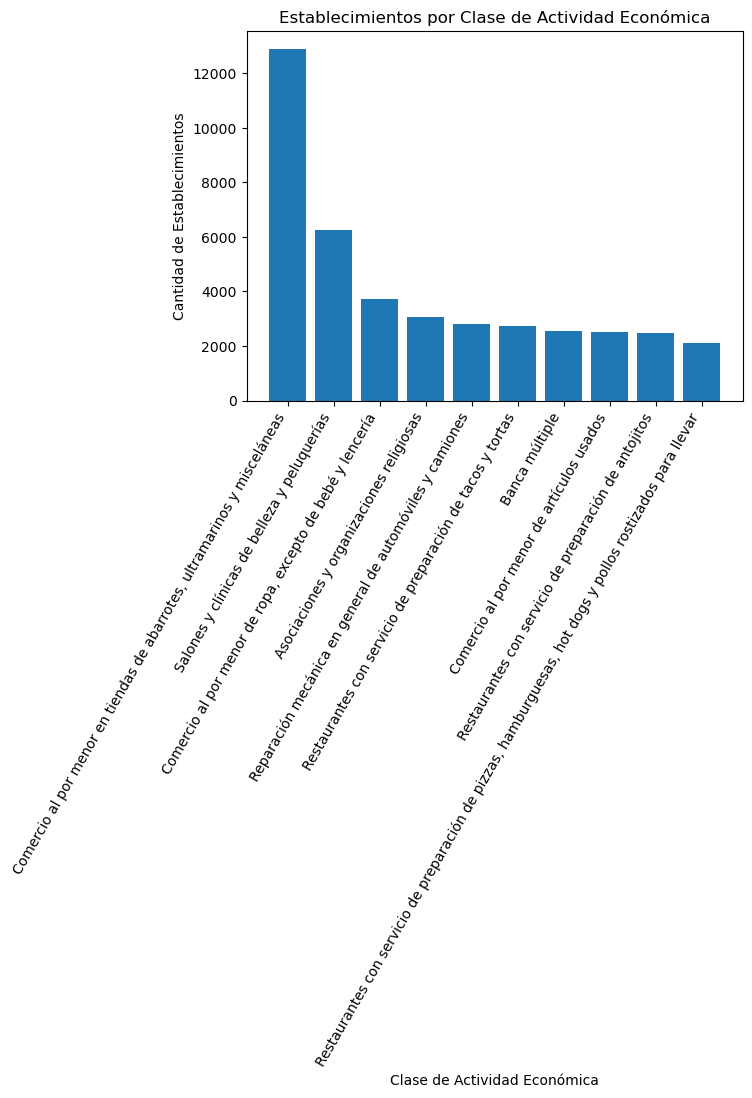

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
#cantidad de establecimientos por clase de actividad económica
#utilizando el método  value_counts()
datos = dfchihuahua['clase_actividad'].value_counts()
# Select the desired number of values for the x-axis
num_values = 10
datos_sliced = datos[:num_values]
#Función  plt.bar()  para crear el gráfico de barras, 
#pasando los datos de las clases de actividad económica 
plt.bar(datos_sliced.index, datos_sliced.values)
# Personalizar el gráfico
plt.title('Establecimientos por Clase de Actividad Económica')
plt.xlabel('Clase de Actividad Económica')
plt.ylabel('Cantidad de Establecimientos')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=60, ha='right')

# Mostrar el gráfico
plt.show()

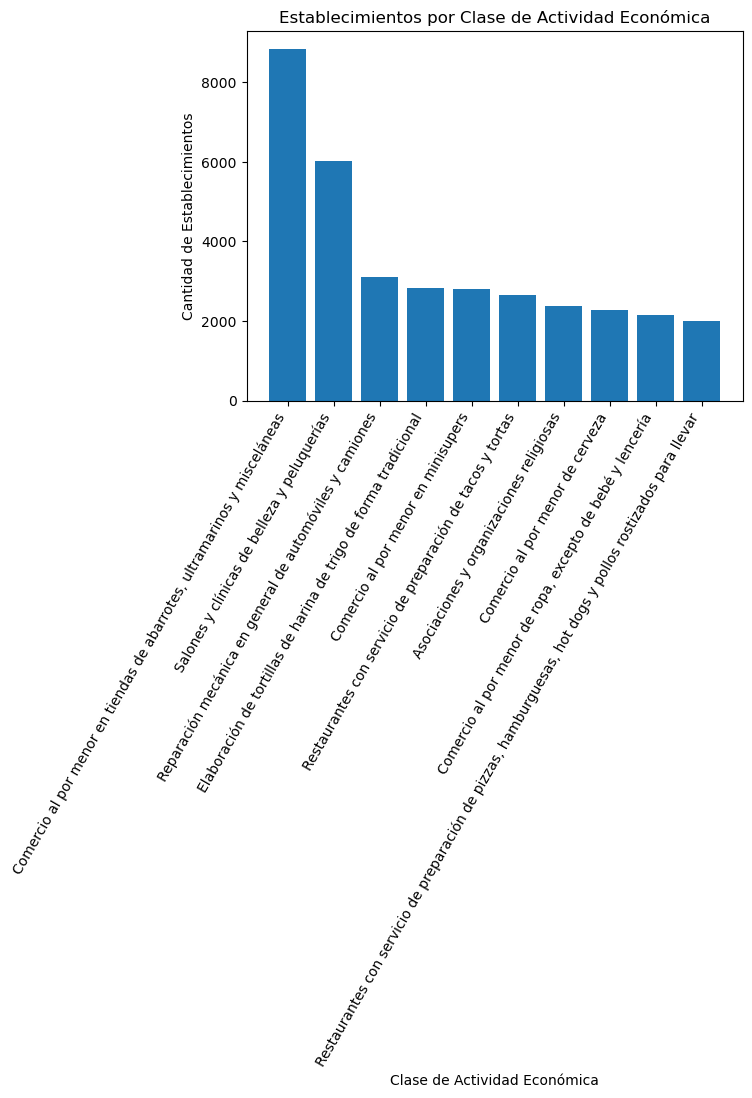

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
#cantidad de establecimientos por clase de actividad económica
#utilizando el método  value_counts()
datos = dfsonora['clase_actividad'].value_counts()
# Select the desired number of values for the x-axis
num_values = 10
datos_sliced = datos[:num_values]
#Función  plt.bar()  para crear el gráfico de barras, 
#pasando los datos de las clases de actividad económica 
plt.bar(datos_sliced.index, datos_sliced.values)
# Personalizar el gráfico
plt.title('Establecimientos por Clase de Actividad Económica')
plt.xlabel('Clase de Actividad Económica')
plt.ylabel('Cantidad de Establecimientos')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=60, ha='right')

# Mostrar el gráfico
plt.show()

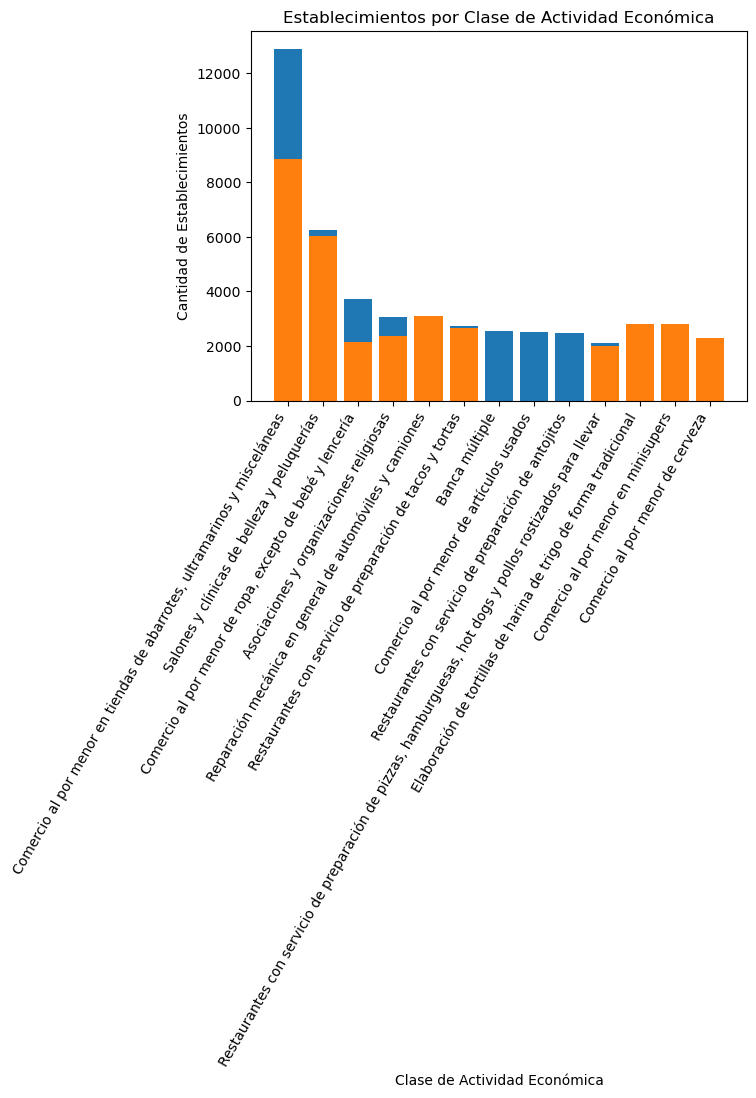

In [53]:
import matplotlib.pyplot as plt

# Datos para el primer gráfico de barras
#cantidad de establecimientos por clase de actividad económica
#utilizando el método  value_counts()
datos1 = dfchihuahua['clase_actividad'].value_counts()
# Select the desired number of values for the x-axis
num_values = 10
datos_sliced1 = datos1[:num_values]

# Datos para el segundo gráfico de barras
#cantidad de establecimientos por clase de actividad económica
#utilizando el método  value_counts()
datos2 = dfsonora['clase_actividad'].value_counts()
# Select the desired number of values for the x-axis
num_values = 10
datos_sliced2 = datos2[:num_values]

#Función  plt.bar()  para crear el gráfico de barras, 
#pasando los datos de las clases de actividad económica 
plt.bar(datos_sliced1.index, datos_sliced1.values)

#Función  plt.bar()  para crear el gráfico de barras, 
#pasando los datos de las clases de actividad económica 
plt.bar(datos_sliced2.index, datos_sliced2.values)


# Personalizar el gráfico
plt.title('Establecimientos por Clase de Actividad Económica')
plt.xlabel('Clase de Actividad Económica')
plt.ylabel('Cantidad de Establecimientos')
# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=60, ha='right')

# Mostrar el gráfico
plt.show()